In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Dense, Flatten, BatchNormalization
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import datetime

cifar10 = tf.keras.datasets.cifar10

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=x_train.shape[1:], activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop', metrics=['accuracy'])

tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir, histogram_freq=1)

model.fit(x_train, y_train, batch_size=128, epochs=25, validation_data=(
    x_test, y_test), shuffle=True, callbacks=[tensorboard_callback])

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 21s 410us/sample - loss: 1.6265 - accuracy: 0.4128 - val_loss: 2.0975 - val_accuracy: 0.2069
Epoch 2/25
50000/50000 [==============================] - 15s 302us/sample - loss: 1.2263 - accuracy: 0.5663 - val_loss: 1.2663 - val_accuracy: 0.5510
Epoch 3/25
50000/50000 [==============================] - 15s 307us/sample - loss: 1.0718 - accuracy: 0.6247 - val_loss: 1.1629 - val_accuracy: 0.5997
Epoch 4/25
50000/50000 [==============================] - 16s 313us/sample - loss: 0.9909 - accuracy: 0.6565 - val_loss: 1.5462 - val_accuracy: 0.5372
Epoch 5/25
50000/50000 [==============================] - 15s 303us/sample - loss: 0.9380 - accuracy: 0.6739 - val_loss: 0.9997 - val_accuracy: 0.6506
Epoch 6/25
50000/50000 [==============================] - 16s 313us/sample - loss: 0.8962 - accuracy: 0.6901 - val_loss: 1.1187 - val_accuracy: 0.6396
Epoch 7/25
50000/50000 [====================

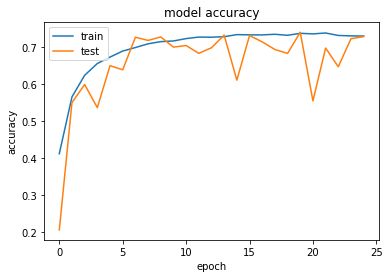

In [2]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

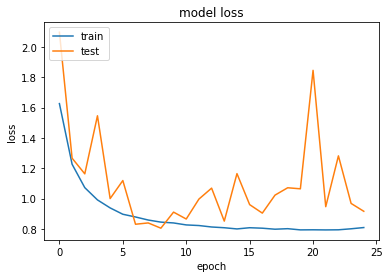

In [3]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

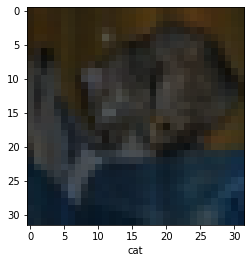

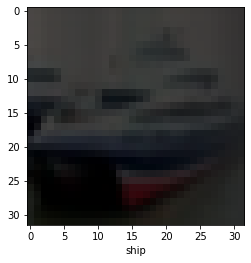

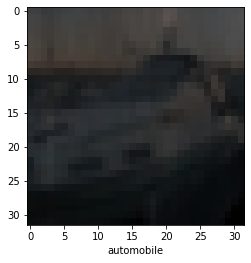

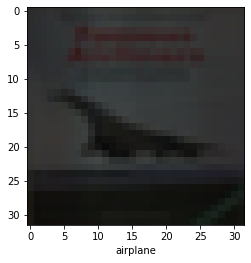

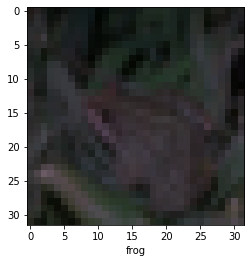

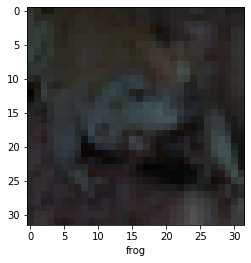

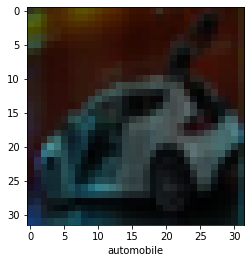

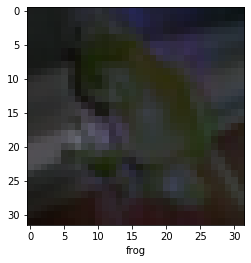

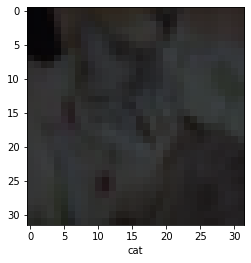

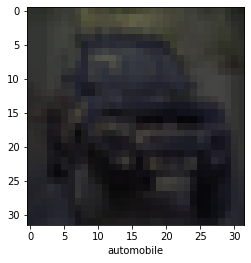

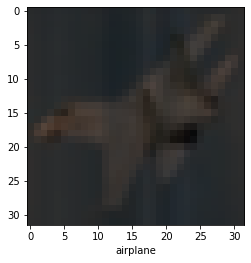

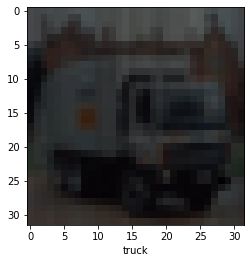

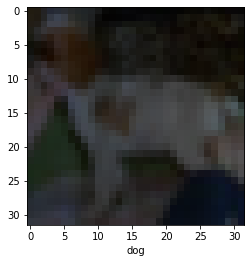

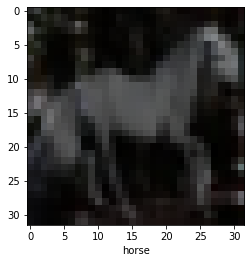

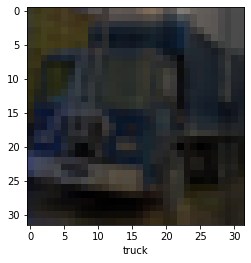

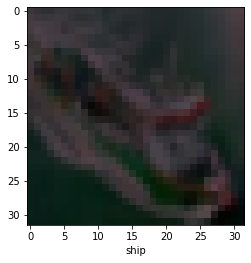

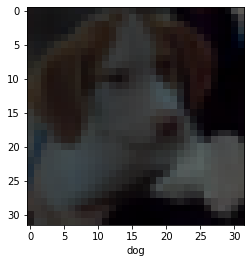

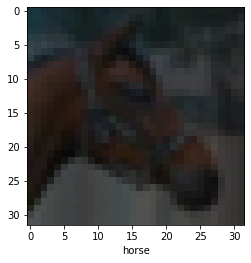

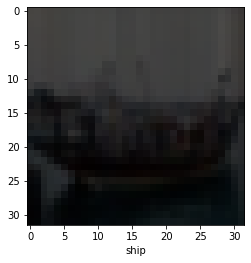

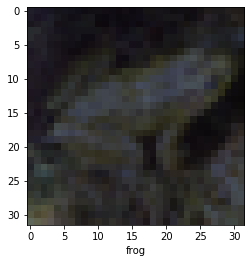

In [4]:
predictions = model.predict([x_test])

for x in range(20):
    plt.imshow(x_test[x])
    predicted_label = np.argmax(predictions[x])
    if(predicted_label == 0):
        label = 'airplane'
    elif(predicted_label == 1):
        label = 'automobile'
    elif(predicted_label == 2):
        label = 'bird'
    elif(predicted_label == 3):
        label = 'cat'
    elif(predicted_label == 4):
        label = 'deer'
    elif(predicted_label == 5):
        label = 'dog'
    elif(predicted_label == 6):
        label = 'frog'
    elif(predicted_label == 7):
        label = 'horse'
    elif(predicted_label == 8):
        label = 'ship'
    elif(predicted_label == 9):
        label = 'truck'
    plt.xlabel(label)
    plt.show()